In [1]:
import pandas as pd
from sklearn.preprocessing import scale

# Load data
data_df = pd.read_csv("c3_marketing-outliers.csv")
x = scale(data_df.tv.values)  # SGDRegressor requires data to be rescaled
y = data_df.sales.values

In [4]:
from sklearn.linear_model import SGDRegressor

# Stochastic Gradient Descent that minimises variety of cost functions

In [7]:
# create linear regression with Huber loss
lr_huber = SGDRegressor(
    loss="huber", penalty="none", epsilon=1, max_iter=1000, tol=1e-3
)

SGD iterative algo taking small steps in direction of optimal solution. SGD stops when loss stops improving (tol) or when reaches max number (max_iter)

The above values are the defaults/recommended

In [8]:
import numpy as np

# fit model
lr_huber.fit(x[:, np.newaxis], y)

SGDRegressor(epsilon=1, loss='huber', penalty='none')

x variable is vector shape (55,) but can convert to matrix (55,1) by adding new axis 

In [9]:
# print slope of the line
print("Slope:", lr_huber.coef_)

Slope: [1.12444631]


In [10]:
#print intercept parameter
print("Intercept term:", lr_huber.intercept_)

Intercept term: [3.78698906]


In [11]:
# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)  # Shape (100,)
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])  # Shape (100,1)

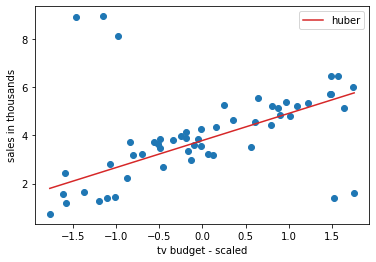

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot predictions
plt.scatter(x, y)
plt.plot(x_values, y_values_huber, c="C3", label="huber")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

Line fits well in this case regardless of outliers

In [13]:
# compare to RSS 

lr_squared = SGDRegressor(loss="squared_error", penalty="none", max_iter=1000, tol=1e-3)

In [14]:
# Fit the model
lr_squared.fit(x[:, np.newaxis], y)

# Compute prediction line
y_values_squared = lr_squared.predict(x_values[:, np.newaxis])

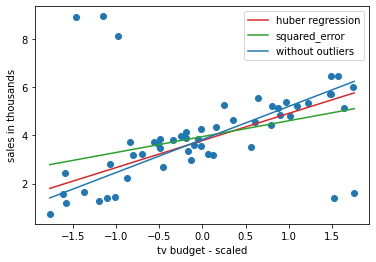

In [15]:
# Linear regression without outliers
coefs = np.polyfit(x[:-5], y[:-5], deg=1)  # Filter outliers (the last five values)
y_values_optimal = np.polyval(coefs, x_values)

# Compare models
plt.scatter(x, y)
plt.plot(x_values, y_values_huber, c="C3", label="huber regression")
plt.plot(x_values, y_values_squared, c="C2", label="squared_error")
plt.plot(x_values, y_values_optimal, c="C0", label="without outliers")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

In [16]:
from sklearn.linear_model import HuberRegressor

# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.35)

# Fit the model
lr_huber.fit(x[:, np.newaxis], y)

HuberRegressor()

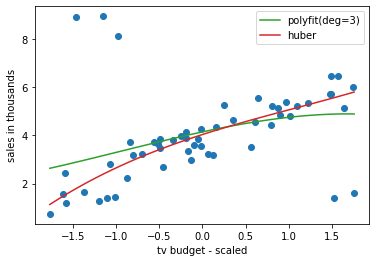

In [17]:
# Fit a polynomial of degree 3
X_poly = np.c_[x, x ** 2, x ** 3]  # Feature engineering
lr_huber.fit(X_poly, y)

# Same with polyfit
coefs = np.polyfit(x, y, deg=3)

# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)
y_values_polyfit = np.polyval(coefs, x_values)
y_values_huber = lr_huber.predict(np.c_[x_values, x_values ** 2, x_values ** 3])

# Plot it
plt.scatter(x, y)
plt.plot(x_values, y_values_polyfit, c="C2", label="polyfit(deg=3)")
plt.plot(x_values, y_values_huber, c="C3", label="huber")
plt.xlabel("tv budget - scaled")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()